In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
champ_df = pd.read_csv("projectData/champs.csv").sort_values('id')
champ_df.head(10)

,name,id
40,Annie,1
99,Olaf,2
33,Galio,3
100,Twisted Fate,4
52,Xin Zhao,5
31,Urgot,6
7,LeBlanc,7
91,Vladimir,8
32,Fiddlesticks,9
22,Kayle,10


In [3]:
champ_df.dtypes

name    object
id       int64
dtype: object

In [7]:
participants_df = pd.read_csv("projectData/participants.csv")
participants_df.head(10)

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID
5,14,10,6,72,11,4,NONE,JUNGLE
6,15,10,7,3,4,12,SOLO,TOP
7,16,10,8,103,14,4,SOLO,MID
8,17,10,9,222,7,4,DUO_CARRY,BOT
9,18,10,10,161,14,4,DUO_SUPPORT,BOT


In [8]:
participants_df.dtypes

id             int64
matchid        int64
player         int64
championid     int64
ss1            int64
ss2            int64
role          object
position      object
dtype: object

In [9]:
participants_df['position'] = participants_df['position'].astype('category')
participants_df['role'] = participants_df['role'].astype('category')
participants_df.dtypes

id               int64
matchid          int64
player           int64
championid       int64
ss1              int64
ss2              int64
role          category
position      category
dtype: object

In [10]:
participants_df = participants_df.merge(champ_df,left_on='championid',right_on='id',how='left').drop(['id_x', 'id_y'], axis=1)
participants_df.columns.values[7] = 'Champion Name'
participants_df.columns.values[2] = 'Champion ID'
participants_df.head(15)

,matchid,player,Champion ID,ss1,ss2,role,position,Champion Name
0,10,1,19,4,11,NONE,JUNGLE,Warwick
1,10,2,267,3,4,DUO_SUPPORT,BOT,Nami
2,10,3,119,7,4,DUO_CARRY,BOT,Draven
3,10,4,114,12,4,SOLO,TOP,Fiora
4,10,5,112,4,3,SOLO,MID,Viktor
5,10,6,72,11,4,NONE,JUNGLE,Skarner
6,10,7,3,4,12,SOLO,TOP,Galio
7,10,8,103,14,4,SOLO,MID,Ahri
8,10,9,222,7,4,DUO_CARRY,BOT,Jinx
9,10,10,161,14,4,DUO_SUPPORT,BOT,VelKoz


In [11]:
stats_df = pd.read_csv('projectData/stats1.csv')
stats_df.head(10)

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0
5,14,1,1400,3111,3078,3742,1033,3067,3340,3,...,111,81,30,808,16,0,0,8,2,0
6,15,1,3025,3193,3068,3047,1028,3082,3363,4,...,6,0,6,179,16,1,0,7,0,0
7,16,1,3135,3165,3089,3020,1058,3136,3340,13,...,6,3,3,48,17,0,0,8,0,0
8,17,1,3046,3031,3006,3085,3072,1029,3340,15,...,7,2,5,440,16,1,0,6,1,1
9,18,1,1058,2045,3092,3089,3113,3158,3364,4,...,2,1,1,260,16,5,0,25,7,0


In [12]:
stats2_df = pd.read_csv('projectData/stats2.csv',low_memory=False)
stats_df = stats_df.append(stats2_df)
stats_df.shape
# stats_df['wardsbought'].fillna(0)
# stats_df['wardsbought'] = stats_df['wardsbought'].astype('int64')

# stats_df.dtypes

(1834517, 56)

In [13]:
stats_df = stats_df.reset_index(drop=True)
stats_df.head(10)

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0
5,14,1,1400,3111,3078,3742,1033,3067,3340,3,...,111,81,30,808,16,0,0,8,2,0
6,15,1,3025,3193,3068,3047,1028,3082,3363,4,...,6,0,6,179,16,1,0,7,0,0
7,16,1,3135,3165,3089,3020,1058,3136,3340,13,...,6,3,3,48,17,0,0,8,0,0
8,17,1,3046,3031,3006,3085,3072,1029,3340,15,...,7,2,5,440,16,1,0,6,1,1
9,18,1,1058,2045,3092,3089,3113,3158,3364,4,...,2,1,1,260,16,5,0,25,7,0


In [14]:
# stats_df = stats_df.drop('index',axis=1)
# stats_df.head(10)

In [15]:
participants_df['index'] = participants_df.index
participants_df.head(10)

,matchid,player,Champion ID,ss1,ss2,role,position,Champion Name,index
0,10,1,19,4,11,NONE,JUNGLE,Warwick,0
1,10,2,267,3,4,DUO_SUPPORT,BOT,Nami,1
2,10,3,119,7,4,DUO_CARRY,BOT,Draven,2
3,10,4,114,12,4,SOLO,TOP,Fiora,3
4,10,5,112,4,3,SOLO,MID,Viktor,4
5,10,6,72,11,4,NONE,JUNGLE,Skarner,5
6,10,7,3,4,12,SOLO,TOP,Galio,6
7,10,8,103,14,4,SOLO,MID,Ahri,7
8,10,9,222,7,4,DUO_CARRY,BOT,Jinx,8
9,10,10,161,14,4,DUO_SUPPORT,BOT,VelKoz,9


In [16]:
participants_stats_df = participants_df.merge(stats_df,left_on='index',right_on='id')
participants_stats_df.head(10)

,matchid,player,Champion ID,ss1,ss2,role,position,Champion Name,index,id,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,10,10,161,14,4,DUO_SUPPORT,BOT,VelKoz,9,9,...,69,42,27,610,13,0,0,10,0,0
1,11,1,115,3,4,DUO_SUPPORT,BOT,Ziggs,10,10,...,1,1,0,211,14,1,0,17,3,0
2,11,2,69,4,7,DUO_CARRY,BOT,Cassiopeia,11,11,...,3,1,2,182,14,1,0,13,5,0
3,11,3,157,14,4,SOLO,MID,Yasuo,12,12,...,6,6,0,106,15,0,0,3,0,0
4,11,4,4,4,12,SOLO,TOP,Twisted Fate,13,13,...,4,3,1,159,15,0,0,10,0,0
5,11,5,28,4,11,NONE,JUNGLE,Evelynn,14,14,...,111,81,30,808,16,0,0,8,2,0
6,11,6,51,7,4,DUO_CARRY,BOT,Caitlyn,15,15,...,6,0,6,179,16,1,0,7,0,0
7,11,7,62,14,4,SOLO,TOP,Wukong,16,16,...,6,3,3,48,17,0,0,8,0,0
8,11,8,134,4,1,SOLO,MID,Syndra,17,17,...,7,2,5,440,16,1,0,6,1,1
9,11,9,43,14,4,DUO_SUPPORT,BOT,Karma,18,18,...,2,1,1,260,16,5,0,25,7,0


In [17]:
participants_stats_df = participants_stats_df.drop('index',axis=1)
participants_stats_df.head(10)

,matchid,player,Champion ID,ss1,ss2,role,position,Champion Name,id,win,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,10,10,161,14,4,DUO_SUPPORT,BOT,VelKoz,9,0,...,69,42,27,610,13,0,0,10,0,0
1,11,1,115,3,4,DUO_SUPPORT,BOT,Ziggs,10,0,...,1,1,0,211,14,1,0,17,3,0
2,11,2,69,4,7,DUO_CARRY,BOT,Cassiopeia,11,0,...,3,1,2,182,14,1,0,13,5,0
3,11,3,157,14,4,SOLO,MID,Yasuo,12,0,...,6,6,0,106,15,0,0,3,0,0
4,11,4,4,4,12,SOLO,TOP,Twisted Fate,13,0,...,4,3,1,159,15,0,0,10,0,0
5,11,5,28,4,11,NONE,JUNGLE,Evelynn,14,1,...,111,81,30,808,16,0,0,8,2,0
6,11,6,51,7,4,DUO_CARRY,BOT,Caitlyn,15,1,...,6,0,6,179,16,1,0,7,0,0
7,11,7,62,14,4,SOLO,TOP,Wukong,16,1,...,6,3,3,48,17,0,0,8,0,0
8,11,8,134,4,1,SOLO,MID,Syndra,17,1,...,7,2,5,440,16,1,0,6,1,1
9,11,9,43,14,4,DUO_SUPPORT,BOT,Karma,18,1,...,2,1,1,260,16,5,0,25,7,0


In [18]:
participants_stats_df = participants_stats_df[1:]
participants_stats_df.head(10)

,matchid,player,Champion ID,ss1,ss2,role,position,Champion Name,id,win,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
1,11,1,115,3,4,DUO_SUPPORT,BOT,Ziggs,10,0,...,1,1,0,211,14,1,0,17,3,0
2,11,2,69,4,7,DUO_CARRY,BOT,Cassiopeia,11,0,...,3,1,2,182,14,1,0,13,5,0
3,11,3,157,14,4,SOLO,MID,Yasuo,12,0,...,6,6,0,106,15,0,0,3,0,0
4,11,4,4,4,12,SOLO,TOP,Twisted Fate,13,0,...,4,3,1,159,15,0,0,10,0,0
5,11,5,28,4,11,NONE,JUNGLE,Evelynn,14,1,...,111,81,30,808,16,0,0,8,2,0
6,11,6,51,7,4,DUO_CARRY,BOT,Caitlyn,15,1,...,6,0,6,179,16,1,0,7,0,0
7,11,7,62,14,4,SOLO,TOP,Wukong,16,1,...,6,3,3,48,17,0,0,8,0,0
8,11,8,134,4,1,SOLO,MID,Syndra,17,1,...,7,2,5,440,16,1,0,6,1,1
9,11,9,43,14,4,DUO_SUPPORT,BOT,Karma,18,1,...,2,1,1,260,16,5,0,25,7,0
10,11,10,19,4,11,NONE,JUNGLE,Warwick,19,0,...,2,2,0,236,12,3,0,14,3,0


In [19]:
participants_stats_df['Champion Name'].unique()

array(['Ziggs', 'Cassiopeia', 'Yasuo', 'Twisted Fate', 'Evelynn',
       'Caitlyn', 'Wukong', 'Syndra', 'Karma', 'Warwick', 'Draven',
       'Janna', 'Lux', 'Amumu', 'Vayne', 'Ahri', 'Vi', 'Nami', 'Twitch',
       'LeBlanc', 'Jinx', 'Poppy', 'Zed', 'Tristana', 'Gragas',
       'Master Yi', 'Rakan', 'Lissandra', 'Orianna', 'Urgot', 'Zac',
       'Lucian', 'Darius', 'Morgana', 'Miss Fortune', 'Thresh', 'Garen',
       'Tryndamere', 'Lee Sin', 'Karthus', 'Taric', 'Kassadin', 'Nasus',
       'Leona', 'Ezreal', 'VelKoz', 'Ashe', 'Zilean', 'Jarvan IV', 'Teemo',
       'Illaoi', 'Sejuani', 'KogMaw', 'Akali', 'Blitzcrank', 'Renekton',
       'Katarina', 'Ekko', 'Xayah', 'Fizz', 'Shen', 'Alistar', 'Trundle',
       'Anivia', 'Veigar', 'Bard', 'Nunu', 'Camille', 'Viktor', 'KhaZix',
       'Fiora', 'Gangplank', 'Brand', 'Graves', 'Talon', 'Nautilus',
       'Rumble', 'Vladimir', 'Irelia', 'Ivern', 'Heimerdinger', 'Braum',
       'Pantheon', 'Zyra', 'Kalista', 'Kled', 'Jhin', 'Varus', 'Galio',
   

In [20]:
participants_stats_df.columns

Index(['matchid', 'player', 'Champion ID', 'ss1', 'ss2', 'role', 'position',
       'Champion Name', 'id', 'win', 'item1', 'item2', 'item3', 'item4',
       'item5', 'item6', 'trinket', 'kills', 'deaths', 'assists',
       'largestkillingspree', 'largestmultikill', 'killingsprees',
       'longesttimespentliving', 'doublekills', 'triplekills', 'quadrakills',
       'pentakills', 'legendarykills', 'totdmgdealt', 'magicdmgdealt',
       'physicaldmgdealt', 'truedmgdealt', 'largestcrit', 'totdmgtochamp',
       'magicdmgtochamp', 'physdmgtochamp', 'truedmgtochamp', 'totheal',
       'totunitshealed', 'dmgselfmit', 'dmgtoobj', 'dmgtoturrets',
       'visionscore', 'timecc', 'totdmgtaken', 'magicdmgtaken', 'physdmgtaken',
       'truedmgtaken', 'goldearned', 'goldspent', 'turretkills', 'inhibkills',
       'totminionskilled', 'neutralminionskilled', 'ownjunglekills',
       'enemyjunglekills', 'totcctimedealt', 'champlvl', 'pinksbought',
       'wardsbought', 'wardsplaced', 'wardskilled', '

In [21]:
champs_win_sum = participants_stats_df.groupby(['Champion ID','Champion Name']).sum()['win']
champs_win_sum.head(10)

Champion ID  Champion Name
1            Annie            7116
2            Olaf             3166
3            Galio            6390
4            Twisted Fate     4752
5            Xin Zhao         7597
6            Urgot             510
7            LeBlanc          5256
8            Vladimir         5751
9            Fiddlesticks     2990
10           Kayle            3128
Name: win, dtype: int64

Text(0.5,1,'Top 20 Number Champions with Highest Number of Win')

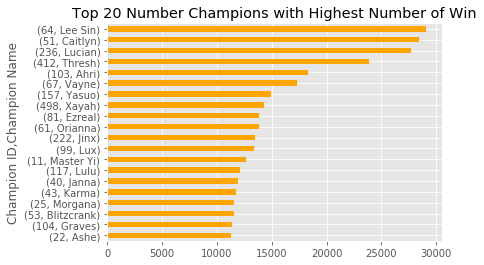

In [22]:
champs_win_sum.sort_values(ascending=True).tail(20).plot.barh(color='orange')
plt.title('Top 20 Number Champions with Highest Number of Win')

In [23]:
participants_stats_df['role'].unique()

[DUO_SUPPORT, DUO_CARRY, SOLO, NONE, DUO]
Categories (5, object): [DUO_SUPPORT, DUO_CARRY, SOLO, NONE, DUO]